In [2]:
import cv2 as cv
import sys
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.pyplot import figure

In [3]:
def cosineplot (x, amplitude, name):
    figure(figsize=(10,4),dpi = 80)
    
    plt.plot(x, amplitude)
    plt.xlabel('Time')
    plt.ylabel("Amplitude = coise(time)")
    
    plt.grid(True, which = 'both')
    plt.axhline(y=0, color='b')
    
    plt.show()

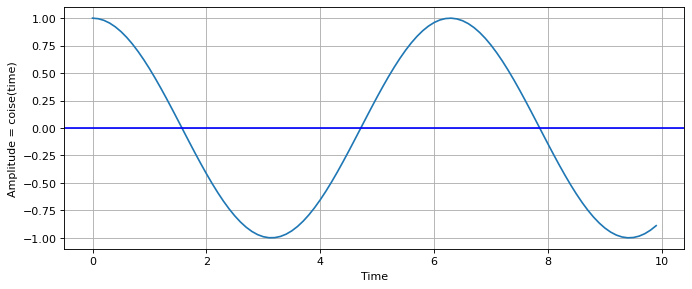

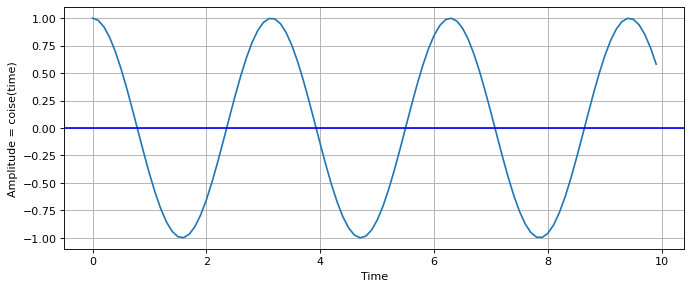

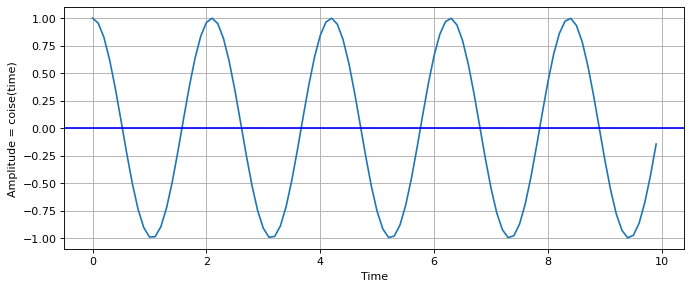

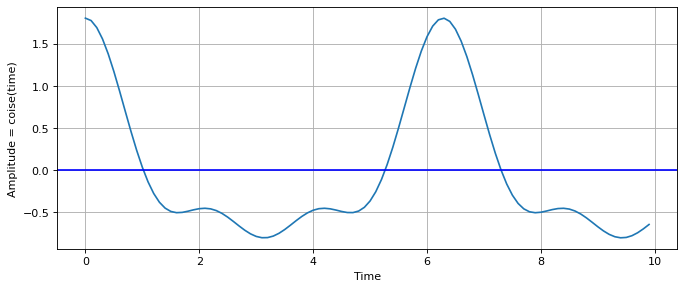

In [4]:
time = np.arange(0,10,0.1)
    
amplitude1 = np.cos(time)
amplitude2 = np.cos(2*time)
amplitude3 = np.cos(3*time)
    
cosineplot(time, amplitude1, "Cosine wave, frequency = 1x")
cosineplot(time, amplitude2, "Cosine wave, frequency = 2x")
cosineplot(time, amplitude3, "Cosine wave, frequency = 3x")

amplitude_s = amplitude1 + 0.5*amplitude2 +0.3*amplitude3
cosineplot(time, amplitude_s, "Sum")

In [493]:
import glob
def showDFFT(img, fft, name):
    magnitude = fft
    #magnitude = np.abs(fft)
    #fftshift смещает с нулевой частотной составляющей к центру
    magnitude = np.fft.fftshift(magnitude)
    
    _,ax = plt.subplots(figsize=(6,6))
    ax.imshow(img, "Greys", vmin = 0, vmax = 255)
    plt.title("Input image " + name)
    plt.xticks([])
    plt.yticks([])
    
    m_real= np.abs(magnitude)
    """
    _,lx = plt.subplots(figsize=(5,5))
    lx.imshow(np.log(1+m_real))#, "Greys")
    plt.title("magnitude1")
    plt.xticks([])
    plt.yticks([])
    """
    
    
    M,N = img.shape
    #Блоку вокруг центра = 0
    K=8
    #Удаляем центр
    magnitude[M//2-K:M//2 + K,N//2-K:N//2+K] = 0
    #Удаляем диагональ 
    for i in range(7):
        magnitude[M//2-K-15-(15*i):M//2-15-(15*i) + K,N//2-K+20+(20*i):N//2+K+20+(20*i)] = 0
        magnitude[M//2-K+15+(15*i):M//2+15+(15*i) + K,N//2-K-20-(20*i):N//2+K-20-(20*i)] = 0
    """
    magnitude[M//2-K-30*2:M//2-30*2 + K,N//2-K+40*2:N//2+K+40*2] = 0
    magnitude[M//2-K+30*2:M//2+30*2 + K,N//2-K-40*2:N//2+K-40*2] = 0
    
    magnitude[M//2-K-30*3:M//2-30*3 + K,N//2-K+40*3:N//2+K+40*3] = 0
    magnitude[M//2-K+30*3:M//2+30*3 + K,N//2-K-40*3:N//2+K-40*3] = 0
    """
    m_real= np.abs(magnitude)
    
    #"""
    _,lx = plt.subplots(figsize=(5,5))
    lx.imshow(np.log(1+m_real))#, "Greys")
    plt.title("Спектр")
    plt.xticks([])
    plt.yticks([])
    #"""
    
    """
    #Все пики выше 98 процентиля
    peaks = magnitude<np.percentile(magnitude,98)
    
    #Сдивинуть пики назад, чтобы выравнить с исходным спектром
    peaks = np.fft.ifftshift(peaks)
    #Копия исходного комплексного спектра
    F_dim = fft.copy()
    #Устанавливаем пики в 0
    F_dim = F_dim*peaks.astype(int)
    #Обратная трансформация Фурье, дабы вернуться к изображению
    image_filtered = np.real(np.fft.ifft2(F_dim)) #real возвращает действительную часть комплексного числа
    """
    
    f_sh=np.fft.ifftshift(magnitude)
    #f_sh=magnitude
    image_filtered = np.real(np.fft.ifft2(f_sh))
    
    
    s_min = magnitude.min()
    s_max = magnitude.max()
    if s_min == s_max:
        plt.subplot(122)
        plt.imshow(magnitude, 'Greys', vmin = 0, vmax = 255)
    else:
        _,ax=plt.subplots(figsize=(6,6))
        ax.imshow(image_filtered, "Greys")#np.log(1+magnitude), 'Greys')
    plt.title('Result')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    plt.show
    print(magnitude.shape)

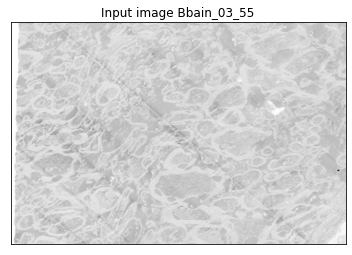

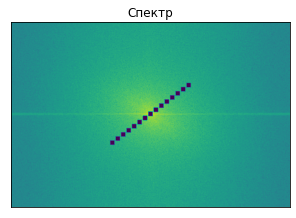

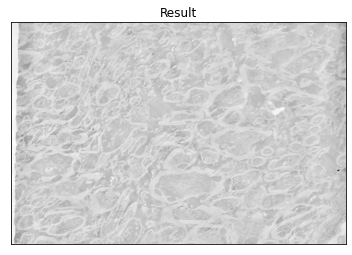

(679, 1024)


In [494]:
img = np.float32(cv.imread(r"Data\Bbain_03_55.png", 0)) #Bbain_03_55 00_18
showDFFT(img, np.fft.fftn(img), "Bbain_03_55")

In [ ]:
#Далее неиспользованные методы из методички

In [330]:
folder_path = r"Data\__119/"
images = glob.glob(folder_path + ".png")
for name in images:
    img = np.float32(cv.imread(name, 0))
    f = np.ftt.ftt2(img)
    fshift = np.ftt.fttshift(f)
    showDFFT(img, fshift, name)

In [ ]:
def DFFTnp(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    return fshift

def reverseDFFTnp(dfft):
    f_ishift = np.fft.ifftshift(dfft)
    reverse_image = np.fft.ifft2(f_ishift)
    return reverse_image

In [ ]:
img = np.float32(cv.imread(r"Data\__119.png", 0))
fshift = DFFTnp(img)

In [ ]:
plt.imshow(img, cmap = 'gray')
plt.show()

In [6]:
ksize = 3
kernel = np.zeros(img.shape)
sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
kernel[0:ksize, 0:ksize] = sobel_h

fkshift = DFFTnp(kernel)
mult = np.multiply(fshift, fkshift)

reverse_image = reverseDFFTnp(mult)

plt.imshow(abs(reverse_image), cmap = 'gray')
plt.title("Sobel")
plt.show()

NameError: name 'img' is not defined

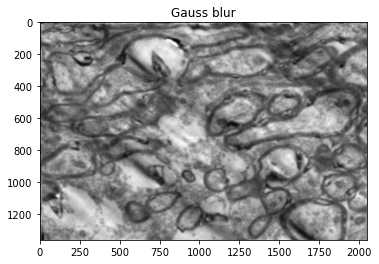

In [35]:
ksize = 21
kernel = np.zeros(img.shape)

blur = cv.getGaussianKernel(ksize, -1)
blur = np.matmul(blur, np.transpose(blur))
kernel[0:ksize, 0:ksize] = blur

fkshift = DFFTnp(kernel)
mult = np.multiply(fshift, fkshift)
reverse_image = reverseDFFTnp(mult)

plt.imshow(abs(reverse_image), cmap = 'gray')
plt.title("Gauss blur")
plt.show()